## Importing All required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Read Data

In [2]:
x_train = np.genfromtxt('../Datasets/X_train.csv', delimiter = ',')[1:, 1:]
x_test  = np.genfromtxt('../Datasets/X_test.csv', delimiter = ',')[1:, 1:]

In [3]:
y_train = np.genfromtxt('../Datasets/y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('../Datasets/y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

## Base Line Model

In [4]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [5]:
print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        29
         1.0       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-----------------------------------------------------------------------


In [6]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Confusion matrix : 
 [[26  3]
 [ 5 27]]
-----------------------------------------------------------------------
Train Accuracy : 86.36%
Test Accuracy  : 86.89%
-----------------------------------------------------------------------


## Effect of n_neighbors on accuracy

In [9]:
x_axis = []
y_axis = []
for i in range(1, 22, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(i, " : ", accuracy_score(y_test, y_pred))
    x_axis.append(i)
    y_axis.append(accuracy_score(y_test, y_pred))

1  :  0.819672131147541
3  :  0.8360655737704918
5  :  0.8688524590163934
7  :  0.8852459016393442
9  :  0.8524590163934426
11  :  0.8688524590163934
13  :  0.8360655737704918
15  :  0.819672131147541
17  :  0.8360655737704918
19  :  0.819672131147541
21  :  0.819672131147541


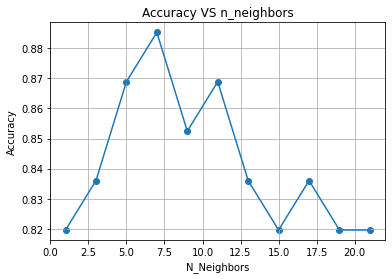

In [10]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_axis)
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.title("Accuracy VS n_neighbors")
plt.grid()
plt.show()

## Grid search

In [27]:
param = [
  {
      'n_neighbors':[1,3,5,7,9,11,13,15],
      'weights':['uniform', 'distance'],
      'metric' : ['euclidean','manhattan','minkowski'], 
      'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
      'p':[1,2],
   },
 ]
grid_clf = GridSearchCV(clf, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(x_train,y_train)
grid_clf.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [19]:
classifier = KNeighborsClassifier(n_neighbors =7,metric='manhattan' ,weights = 'uniform', p = 1,algorithm= 'auto')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [20]:
print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-----------------------------------------------------------------------


In [21]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Confusion matrix : 
 [[25  4]
 [ 4 28]]
-----------------------------------------------------------------------
Train Accuracy : 86.36%
Test Accuracy  : 86.89%
-----------------------------------------------------------------------
